# This is an assignment for Linear Regression 
### Name : Sujith Chandrasekaran
<font color = Red >==========================================================================================</font>

### Problem Statement:
    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues 
    due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the 
    current market scenario. 
    So, it has decided to come up with a mindful business plan to be able to accelerate its revenue 
    as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
    
    ** Which variables are significant in predicting the demand for shared bikes.
    ** How well those variables describe the bike demands

### Business Goal:
We are required to model the demand for shared bikes with the available independent variables.

### Steps involved
    Step1: Read Data: Reading and Understanding the data 
    Step2: Data Preperation: Convert Ordinal variables into categorical string , create dummies and scale numericals
    Step3: Model Building: Build 2 models and choose one based on adj R Sqr value.
    Step4: Model Evaluation:  Calculate R-squared score on the test set.

## <font color = Red>Step 1: Reading and Understanding the Data</font>

### 1.1 Read the data

In [1]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import numpy and pandas Libraries
import numpy as np
import pandas as pd

In [3]:
# import Graph libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the Data
bike= pd.read_csv("day.csv")

### Data Dictionary for quick reference:
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### 1.2 Understand the data

In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike.shape

(730, 16)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


`1.2.i.1 Inference:`<BR>
<font color = Green >There is no variable with Missing Value</font>

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
pd.set_option('display.max_rows', None)
# bike.head(730)

`1.2.i.2.Inference:`<br>
<font color=Red> Instant variable is an id variable and hence not needed for analysis. dteday is a date variable and the corerspinding month and yr are available in the data set  hence not needed for analysis <br>
Hence, the below variables can be dropped <br>
    1) instant  <br>
    2) dteday </font>

#### 1.2.a. Drop redundant variable

In [10]:
# drop instant and  dteday 
dropvar =["instant","dteday"]
bike.drop( dropvar , axis=1, inplace=True)
bike.shape

(730, 14)

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 1.2.1 Study Categorical variables:

In [12]:
# Create a list and store them

catVar = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
print(catVar)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


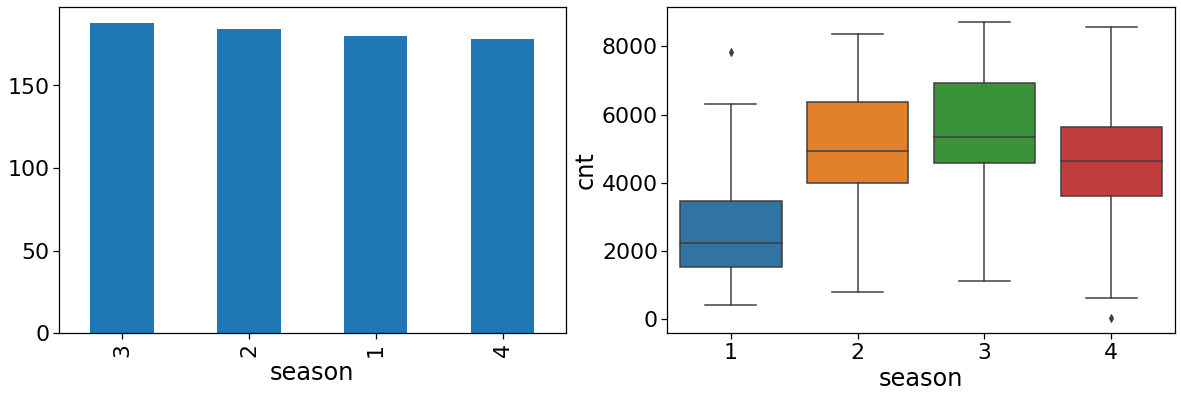

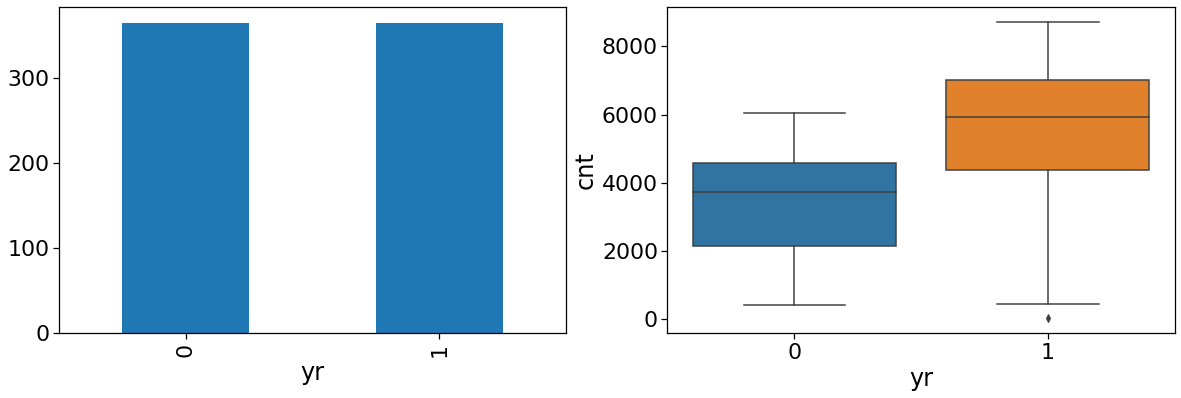

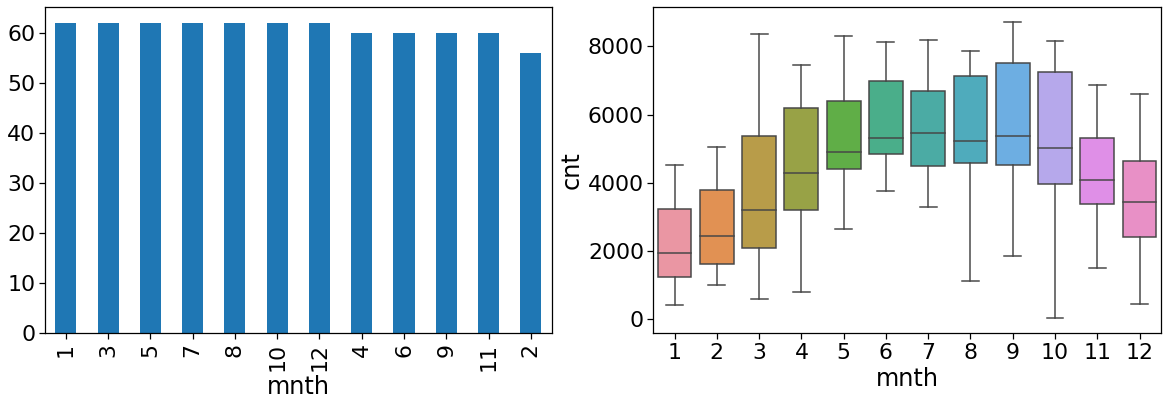

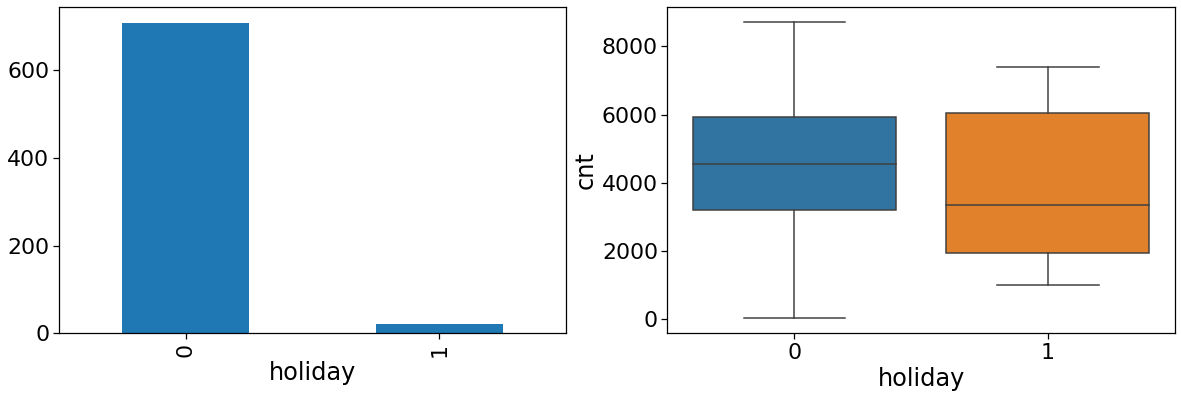

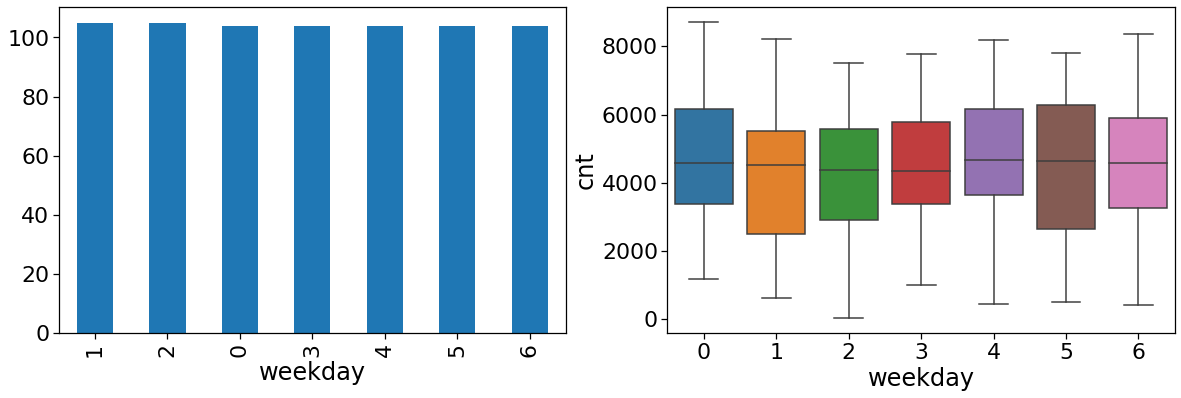

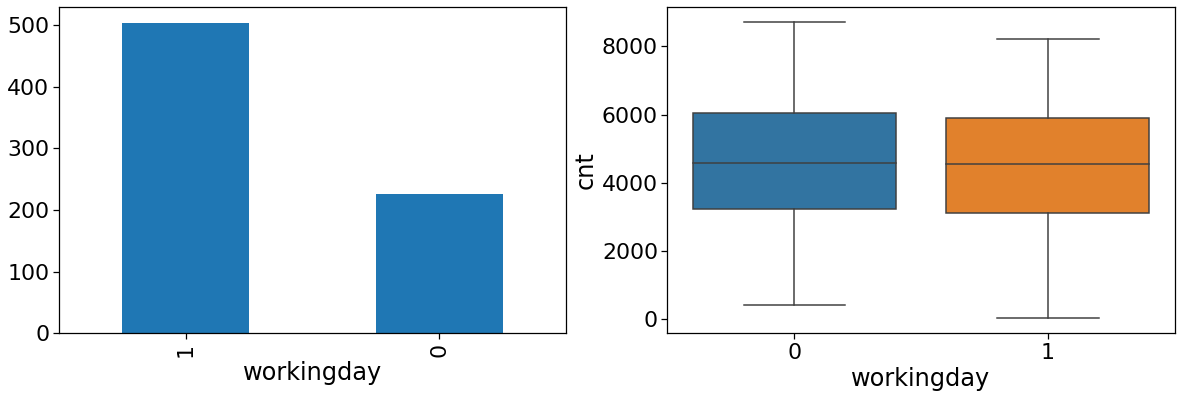

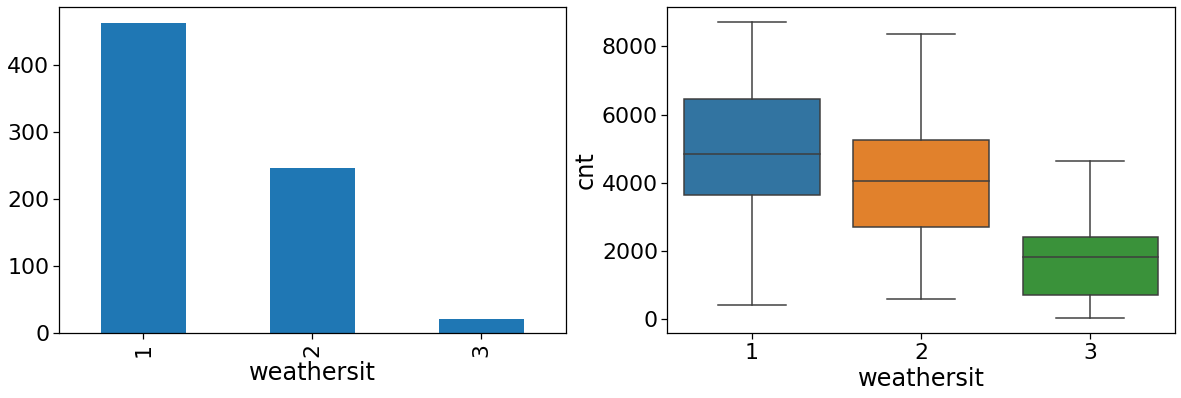

In [13]:
# Visualise Categorical variables
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1.5})
def letscount(df, varlist):
    for var in varlist:
        fig = plt.figure(figsize=(20,6))
        ax1 = fig.add_subplot(1, 2, 1, xlabel = var)
        ax2 = fig.add_subplot(1, 2, 2, xlabel = var)
        df[var].value_counts(dropna=False).sort_values(ascending = False).plot.bar(ax=ax1)
        sns.boxplot(data=df, x=var, y="cnt", ax=ax2)
        plt.show()
    return
letscount(bike,catVar)

`1.2.i3.Inference:`<br>
<font color = Green> 
The below are binary variables <br>
'yr','holiday','workingday'
</font>

In [14]:
# Store binary variable, Categorical and numerical variable in 3 different lists 
binVar= ["yr","holiday","workingday"]
catVar= ["season","mnth","weekday","weathersit"]
numVar = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

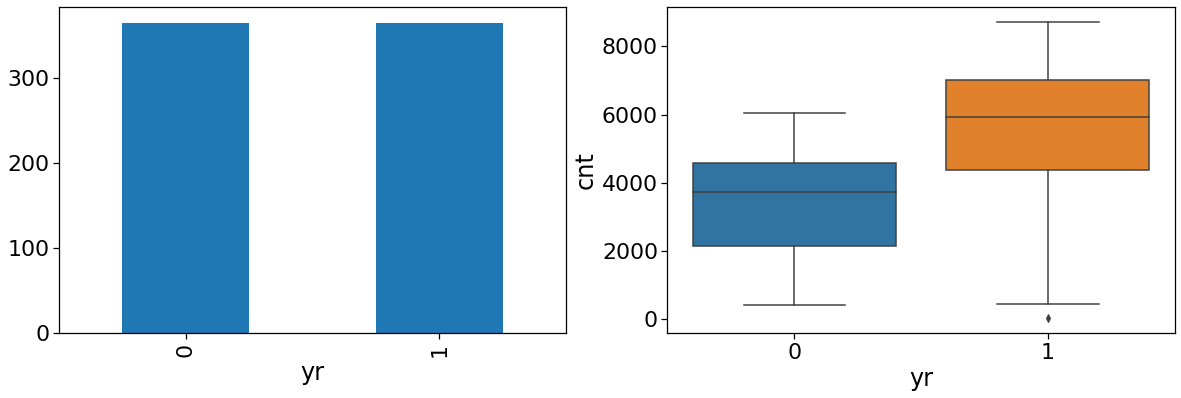

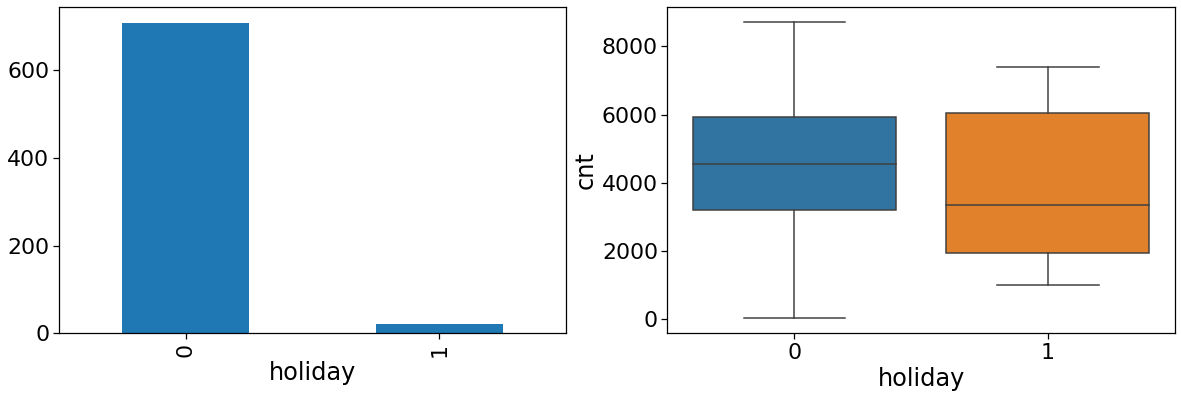

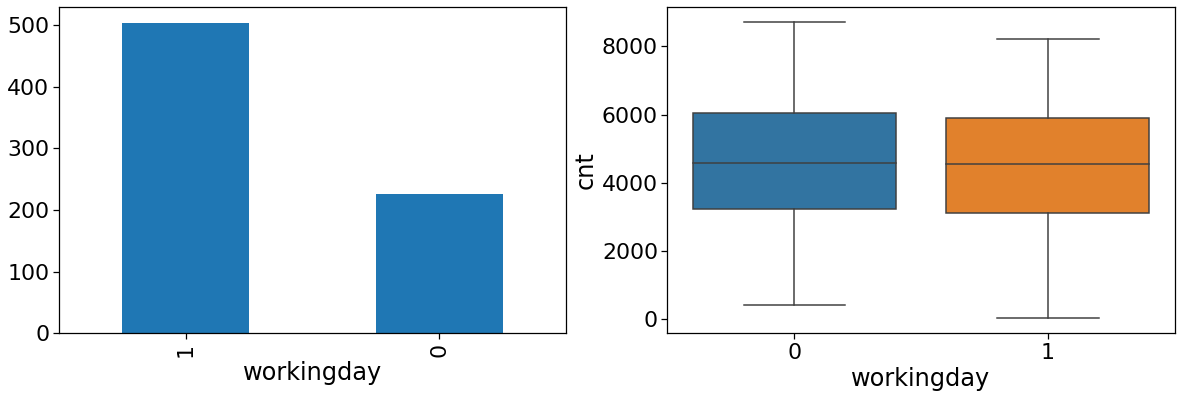

In [15]:
# Visualise BINARY variables

letscount(bike,binVar)

`1.2.i.4.Inference:`<br>
<font color = Blue>
1) 2019 demand is more than 2018 demand<br>
2) There is no significant difference in terms of 75, median & 25 percentile demand between working day and non working day <br>
3) On Holidays, the median demand is less than the Non Holiday </font>

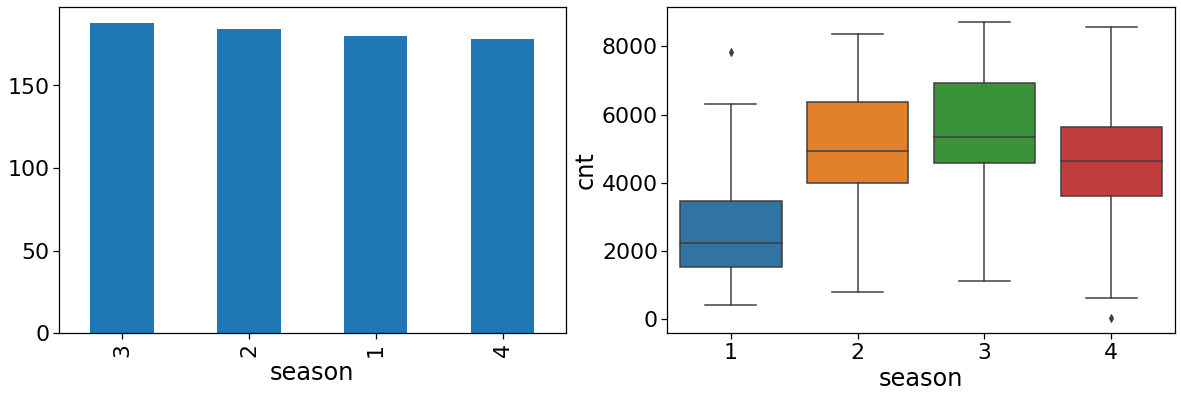

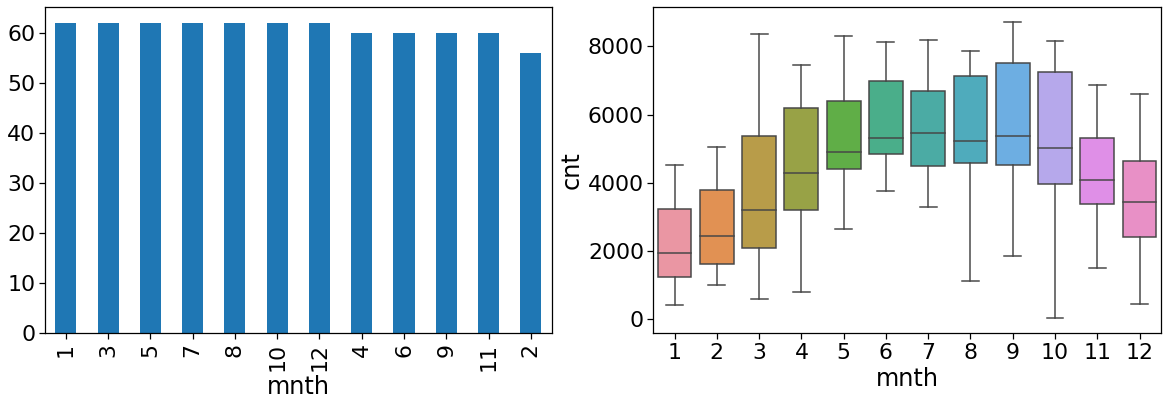

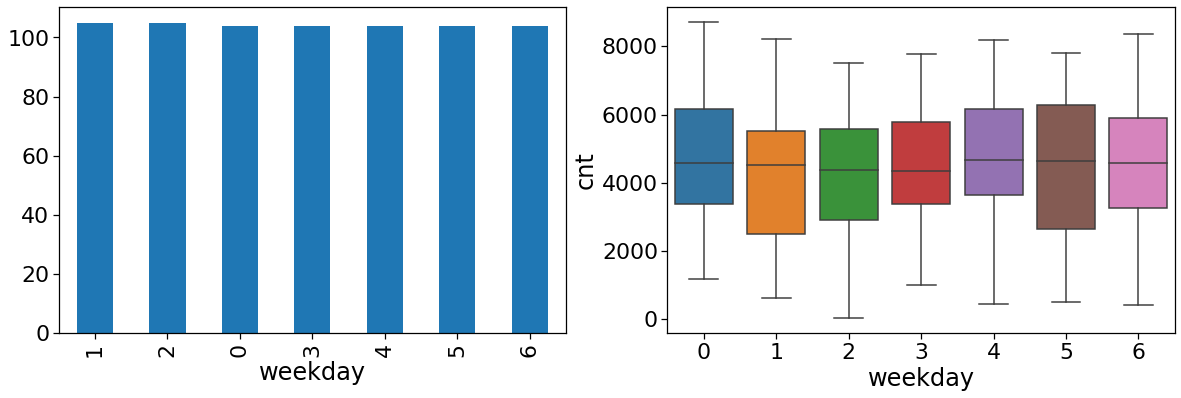

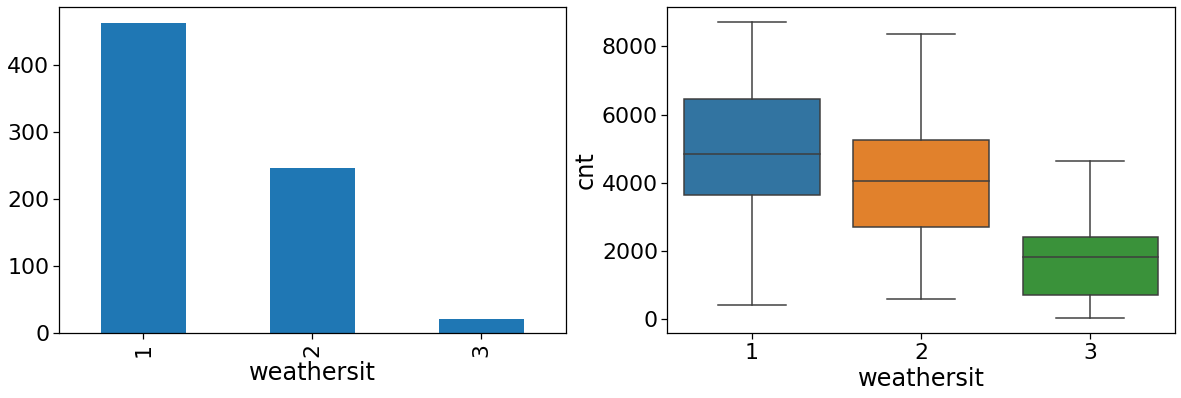

In [16]:
# Visualise Categorical variables

letscount(bike,catVar)

`1.2.i.5.Inference:`<br>
<font color = Blue>
As the data is coded, it is difficult to get the inference. <br>
Hence, convert the Categories into, meaningful values </font>

#### 1.2.1.1 Covert Categorical Variables to Objects:
['season', 'mnth', 'weekday',  'weathersit']
Convert Ordinal variables into categorical string

In [17]:
# Explore the Season using the Value counts

bike["season"].value_counts().sort_index(ascending = True)

1    180
2    184
3    188
4    178
Name: season, dtype: int64

In [18]:
# Covert Season variable to object as per the below:
# 1:spring, 2:summer, 3:fall, 4:winter
bike["season"] = bike["season"].replace([1,2,3,4],["spring","summer","fall","winter"])
bike["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [19]:
# Explore the mnth using the Value counts

bike["mnth"].value_counts().sort_index(ascending = True)


1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [20]:
# Covert mnth variable to object as per the below:
# mnth (1: Jan, 2:Feb , 3 : Mar and so on)

bike["mnth"] = bike["mnth"].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                      ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
bike["mnth"].value_counts()

Jan    62
Mar    62
Aug    62
Jul    62
Dec    62
Oct    62
May    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [21]:
# Explore the weekday using the Value counts

bike["weekday"].value_counts().sort_index(ascending = True)

0    104
1    105
2    105
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [22]:
# Covert weekday variable to object as per the below:
# mnth (0: Sunday, 1:Mon , 2: Tuesday and so on)

bike["weekday"] = bike["weekday"].replace([0,1,2,3,4,5,6],
                                      ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
bike["weekday"].value_counts()

Mon    105
Tue    105
Thu    104
Sun    104
Sat    104
Fri    104
Wed    104
Name: weekday, dtype: int64

In [23]:
# Explore the weathersit using the Value counts

bike["weathersit"].value_counts().sort_index(ascending = True)

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [24]:
# Covert weathersit variable to object as per the below:
# + weathersit :  1: Clear, 2: Mist ,3: LightSnow, 4: HeavyRain 

bike["weathersit"] = bike["weathersit"].replace([1,2,3,4],["Clear","Mist","LightSnow","HeavyRain"])
bike["weathersit"].value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [25]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


`Checkpoint: All the categorical variables have been conversted to Object type. Hence we can now use get_dummies     functtion to create dummies`

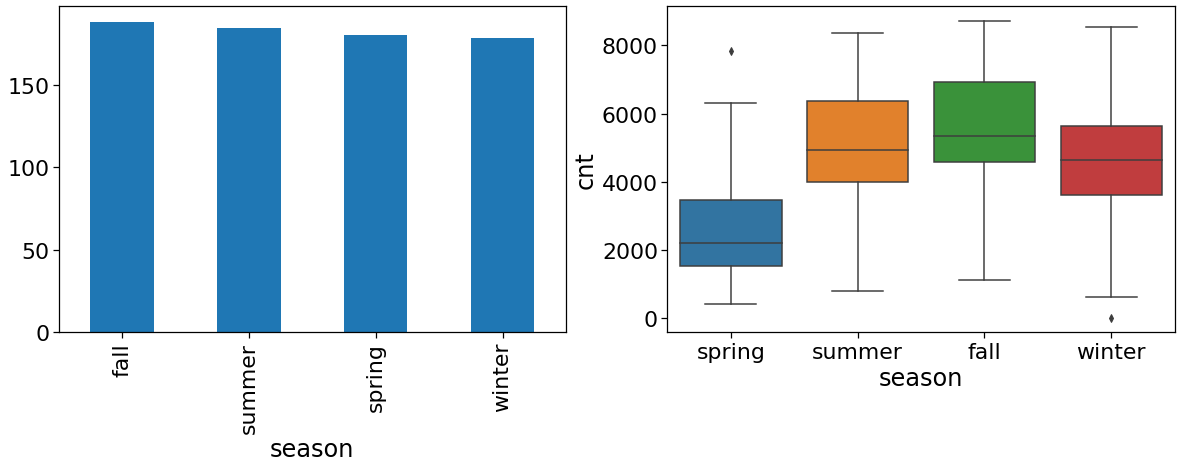

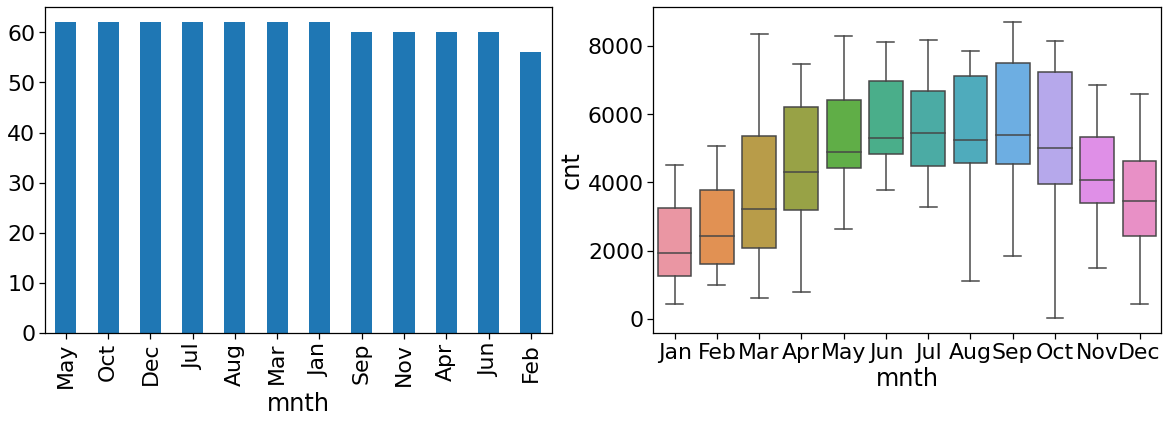

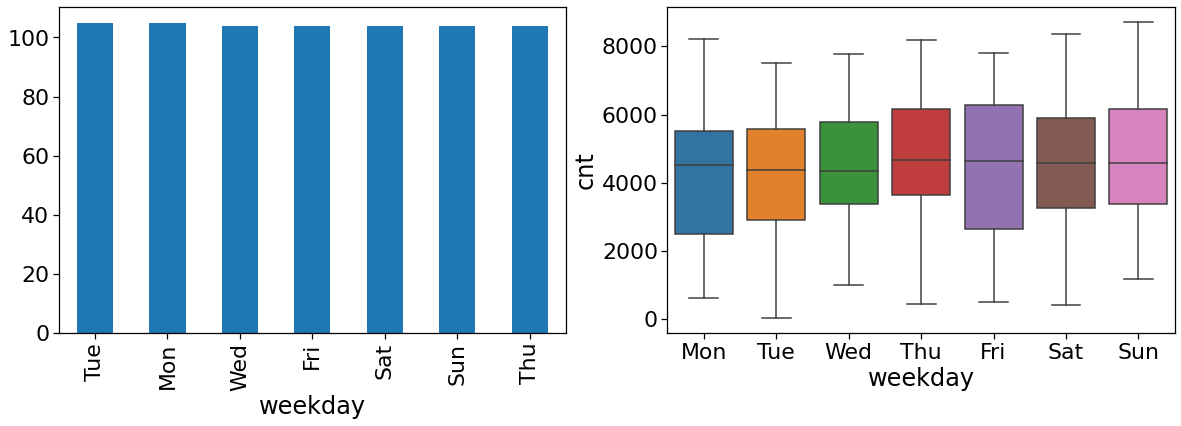

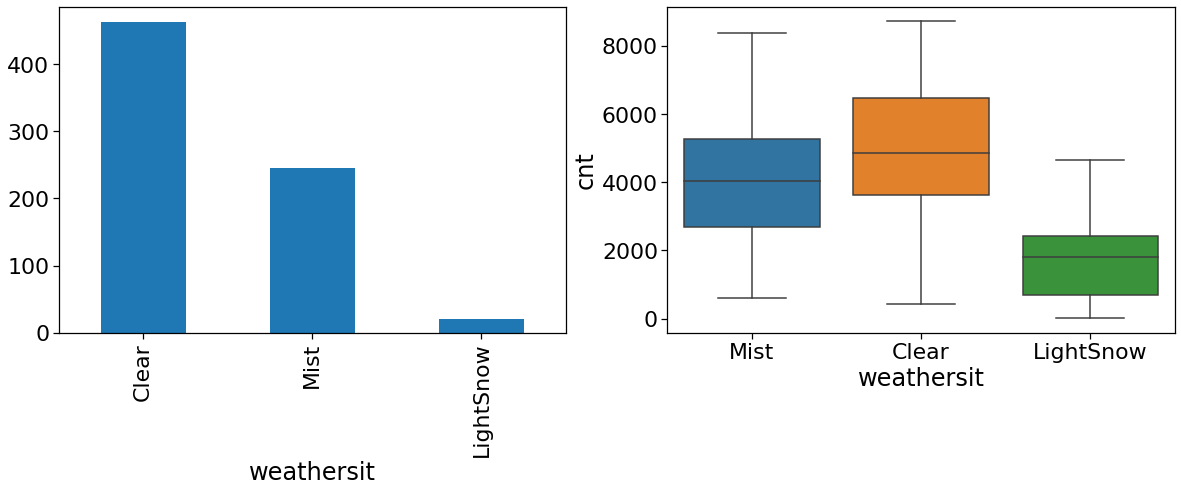

In [26]:
letscount(bike,catVar)

`1.2.i.5.Inference:`<br>
<font color = Green >
1) The median of the demand is high in fall and low in spring<br>
2) Max demand occured in Sep and min demand recorded in one of the days in Oct month. However 
3) Max median demand was recorded in Jul and min median was recorded in Jan.
4) Max Median demand was recorded When the waether is clear weather.
</font>

In [27]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.2.2 Study Numeric Variables

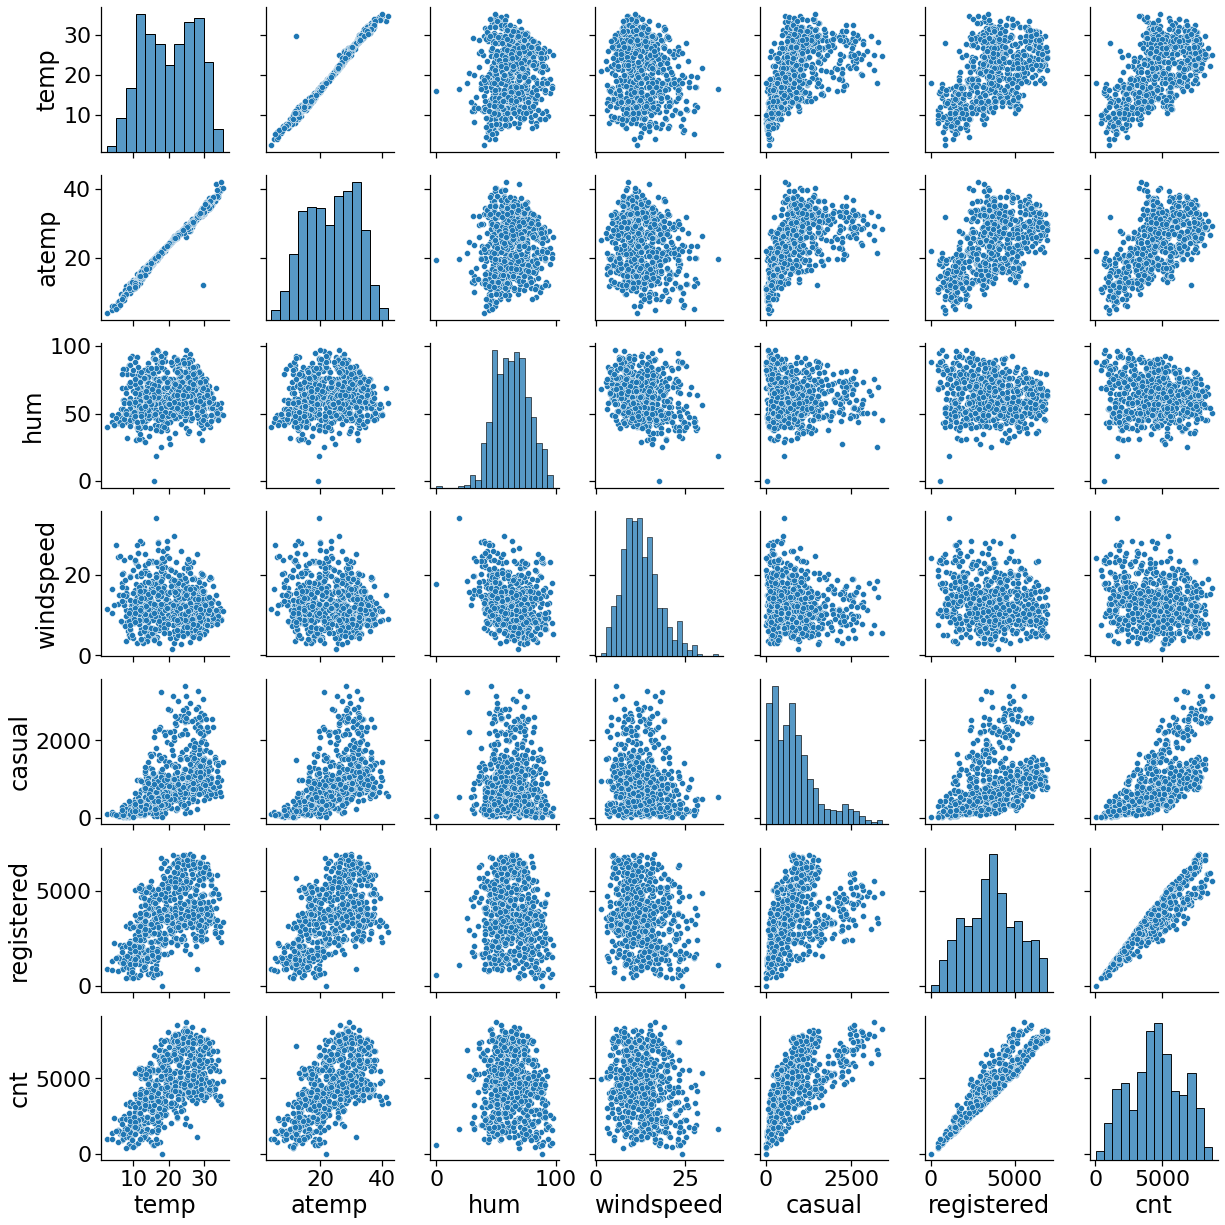

In [28]:
sns.pairplot(bike[numVar])
plt.show()

#### 1.2.2.1 Check the correlation between numeric varials 

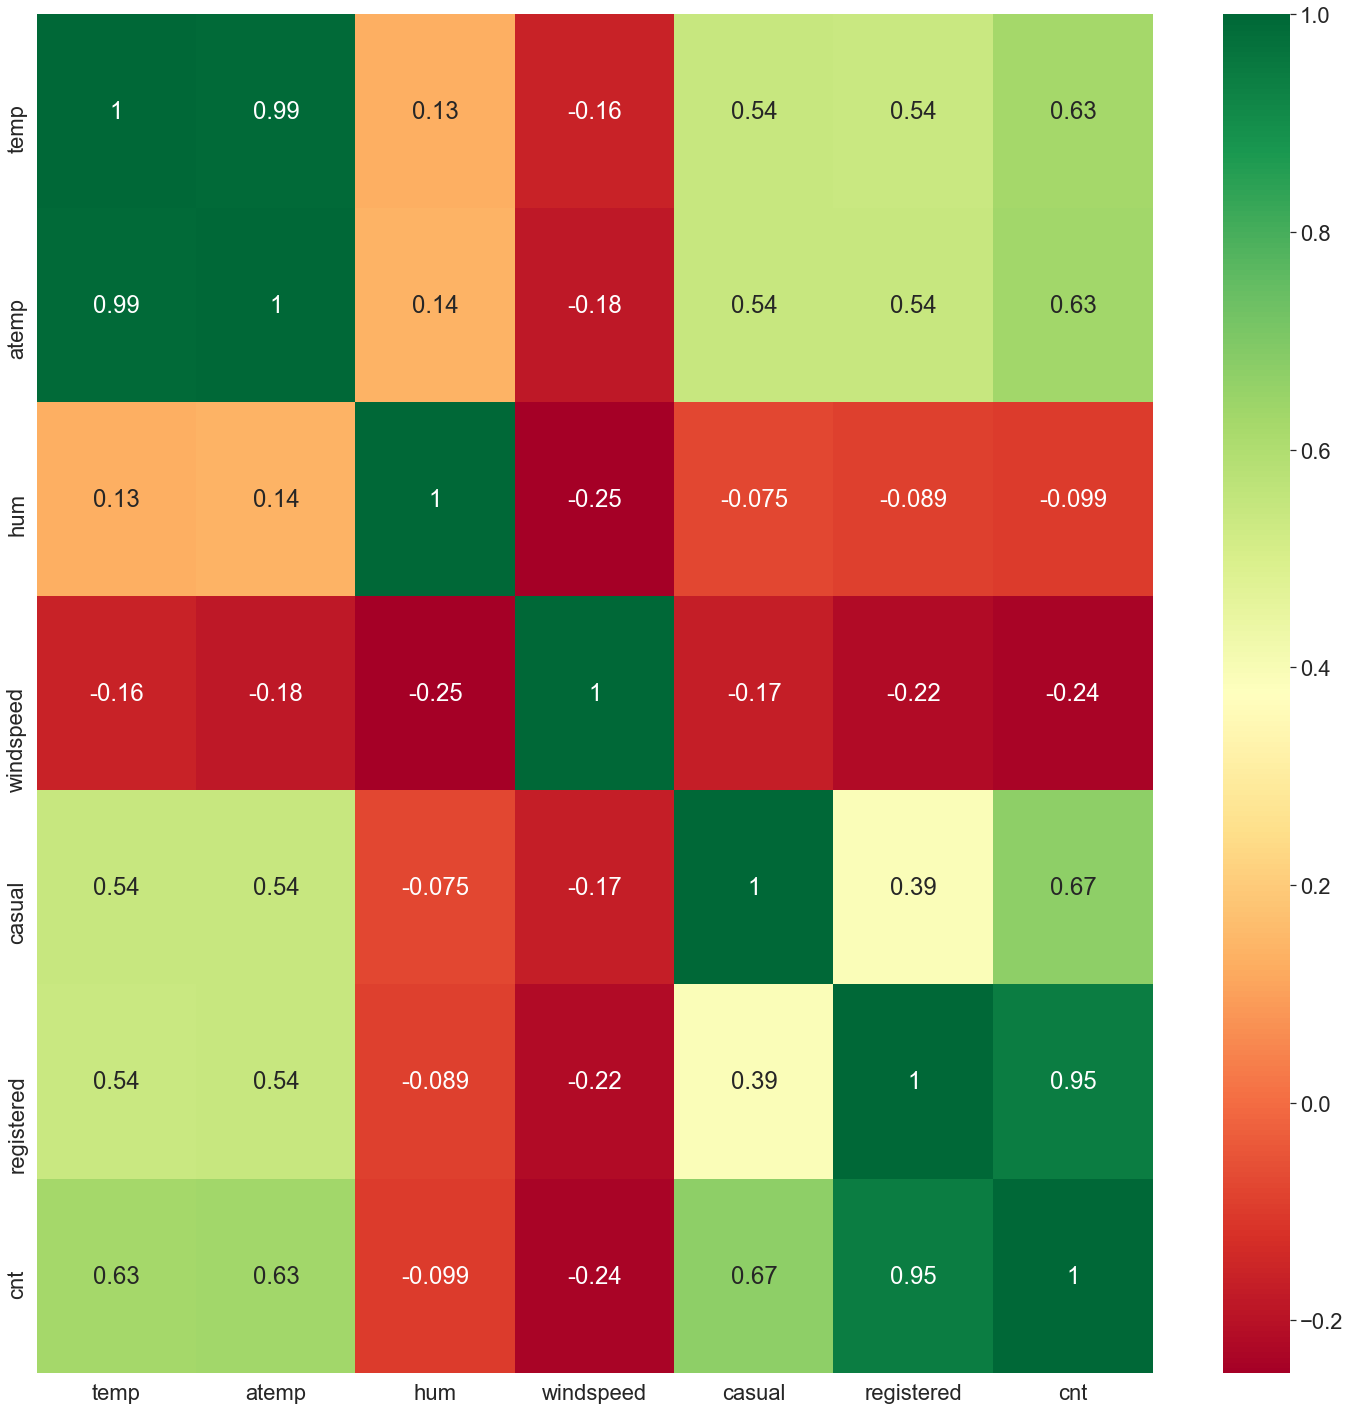

In [29]:
%matplotlib inline
sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(25,25))
sns.heatmap(bike[numVar].corr(), annot=True, cmap="RdYlGn")
plt.show()

`1.2.I.6.Inference:` <BR>
<font color = Green>
1) temp and atemp are highly correalted and hence only one of them can be included <br>
2) As sum registered users and causual users is total users, we cant value the corr between registered and cnt
</font>

In [30]:
### drop the redundant numeric variables casual and registered

dropvar =["casual","registered"]
bike.drop( dropvar , axis=1, inplace=True)
bike.shape

(730, 12)

In [31]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## <font color = Red>Step 2: Data Preperation:</font>
    2.1 Create dummies
    2.2 Divide the data into Train and Test
    2.3 Scale numericals

### 2.1 Create dummies:

In [32]:
# Create dummy variables for the Categorical variables , they are srored in catVar
print(catVar)

['season', 'mnth', 'weekday', 'weathersit']


### 2.1.1 Dummy for Season

In [33]:
bike["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [34]:
# drop first is used to reduce one category as the absence of all other can be treated as the presenece of the first category
seasonD = pd.get_dummies(bike["season"], drop_first = True)  
print(seasonD)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
5         1       0       0
6         1       0       0
7         1       0       0
8         1       0       0
9         1       0       0
10        1       0       0
11        1       0       0
12        1       0       0
13        1       0       0
14        1       0       0
15        1       0       0
16        1       0       0
17        1       0       0
18        1       0       0
19        1       0       0
20        1       0       0
21        1       0       0
22        1       0       0
23        1       0       0
24        1       0       0
25        1       0       0
26        1       0       0
27        1       0       0
28        1       0       0
29        1       0       0
30        1       0       0
31        1       0       0
32        1       0       0
33        1       0       0
34        1       0 

In [35]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, seasonD], axis = 1)

In [36]:
# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [37]:
# Drop Original variable as we have created the dummies for it
bike.drop(["season"], axis = 1, inplace = True)

In [38]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### 2.1.2 Dummy for mnth

In [39]:
bike["mnth"].value_counts()

Jan    62
Mar    62
Aug    62
Jul    62
Dec    62
Oct    62
May    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [40]:
mnthD = pd.get_dummies(bike["mnth"], drop_first = True)
print(mnthD)

     Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0      0    0    0    1    0    0    0    0    0    0    0
1      0    0    0    1    0    0    0    0    0    0    0
2      0    0    0    1    0    0    0    0    0    0    0
3      0    0    0    1    0    0    0    0    0    0    0
4      0    0    0    1    0    0    0    0    0    0    0
5      0    0    0    1    0    0    0    0    0    0    0
6      0    0    0    1    0    0    0    0    0    0    0
7      0    0    0    1    0    0    0    0    0    0    0
8      0    0    0    1    0    0    0    0    0    0    0
9      0    0    0    1    0    0    0    0    0    0    0
10     0    0    0    1    0    0    0    0    0    0    0
11     0    0    0    1    0    0    0    0    0    0    0
12     0    0    0    1    0    0    0    0    0    0    0
13     0    0    0    1    0    0    0    0    0    0    0
14     0    0    0    1    0    0    0    0    0    0    0
15     0    0    0    1    0    0    0    0    0    0   

In [41]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, mnthD], axis = 1)

In [42]:
# Now let's see the head of our dataframe.
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# Drop Original variable as we have created the dummies for it
bike.drop(["mnth"], axis = 1, inplace = True)

In [44]:
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


### 2.1.3 Dummy for weekday

In [45]:
bike["weekday"].value_counts()

Mon    105
Tue    105
Thu    104
Sun    104
Sat    104
Fri    104
Wed    104
Name: weekday, dtype: int64

In [46]:
weekdayD = pd.get_dummies(bike["weekday"], drop_first = True)
print(weekdayD)

     Mon  Sat  Sun  Thu  Tue  Wed
0      1    0    0    0    0    0
1      0    0    0    0    1    0
2      0    0    0    0    0    1
3      0    0    0    1    0    0
4      0    0    0    0    0    0
5      0    1    0    0    0    0
6      0    0    1    0    0    0
7      1    0    0    0    0    0
8      0    0    0    0    1    0
9      0    0    0    0    0    1
10     0    0    0    1    0    0
11     0    0    0    0    0    0
12     0    1    0    0    0    0
13     0    0    1    0    0    0
14     1    0    0    0    0    0
15     0    0    0    0    1    0
16     0    0    0    0    0    1
17     0    0    0    1    0    0
18     0    0    0    0    0    0
19     0    1    0    0    0    0
20     0    0    1    0    0    0
21     1    0    0    0    0    0
22     0    0    0    0    1    0
23     0    0    0    0    0    1
24     0    0    0    1    0    0
25     0    0    0    0    0    0
26     0    1    0    0    0    0
27     0    0    1    0    0    0
28     1    0 

In [47]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weekdayD], axis = 1)

In [48]:
# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Drop Original variable as we have created the dummies for it
bike.drop(["weekday"], axis = 1, inplace = True)

In [50]:
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


### 2.1.4 Dummy for weathersit

In [51]:
bike["weathersit"].value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [52]:
weathersitD = pd.get_dummies(bike["weathersit"], drop_first = True)
print(weathersitD)

     LightSnow  Mist
0            0     1
1            0     1
2            0     0
3            0     0
4            0     0
5            0     0
6            0     1
7            0     1
8            0     0
9            0     0
10           0     1
11           0     0
12           0     0
13           0     0
14           0     1
15           0     0
16           0     1
17           0     1
18           0     1
19           0     1
20           0     0
21           0     0
22           0     0
23           0     0
24           0     1
25           1     0
26           0     0
27           0     1
28           0     0
29           0     0
30           0     1
31           0     1
32           0     1
33           0     0
34           0     1
35           0     1
36           0     0
37           0     0
38           0     0
39           0     1
40           0     0
41           0     0
42           0     0
43           0     0
44           0     0
45           0     0
46           

In [53]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weathersitD], axis = 1)

In [54]:
# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
0,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Drop Original variable as we have created the dummies for it
bike.drop(["weathersit"], axis = 1, inplace = True)

In [56]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Divide the data into Train and Test

In [57]:
df=bike   # User input

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
df_train.shape

(510, 30)

In [59]:
df_test.shape

(219, 30)

### 2.3 Rescaling the feature

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
# We use minmax scaler
scaler = MinMaxScaler()

In [62]:
# Faetures to be scaled stored in variable
numVar = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
print(numVar)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [63]:
# Apply scaler
df_train[numVar] = scaler.fit_transform(df_train[numVar])

In [64]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [65]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


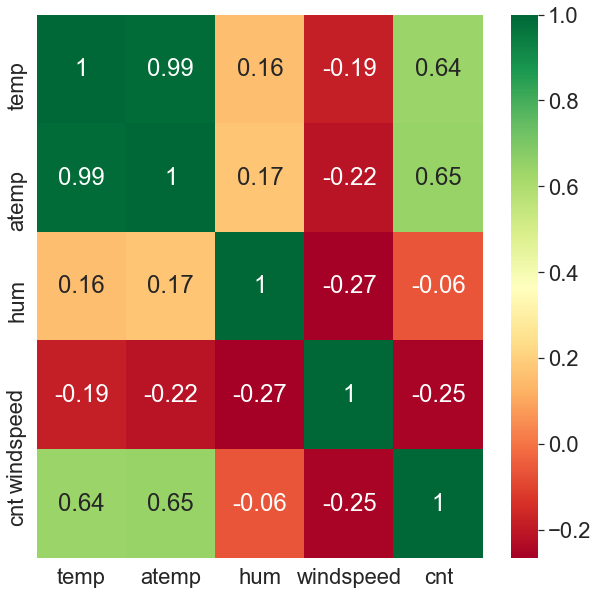

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated

%matplotlib inline
sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(10,10))
sns.heatmap(df_train[numVar].corr(), annot=True, cmap="RdYlGn")
plt.show()

### 2.4 Dividing into X and Y sets for the model building

In [67]:
y_train = df_train.pop("cnt")
X_train = df_train

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  Aug         510 non-null    uint8  
 11  Dec         510 non-null    uint8  
 12  Feb         510 non-null    uint8  
 13  Jan         510 non-null    uint8  
 14  Jul         510 non-null    uint8  
 15  Jun         510 non-null    uint8  
 16  Mar         510 non-null    uint8  
 17  May         510 non-null    uint8  
 18  Nov         510 non-null    uint8  
 19  Oct         510 non-null    

In [69]:
X_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0,0,0,...,0,0,0,0,1,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0,1,0,...,0,0,0,0,0,1,0,0,0,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0,1,0,...,0,0,0,0,0,1,0,0,0,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [70]:
y_train.shape

(510,)

In [71]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## <font color = Red>3.0. Building our model</font>

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### 3.1.RFE
Recursive feature elimination

In [72]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [73]:
# Running RFE with the output number of the variable equal to 15

# User input 
cutoff = 15 

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [74]:
# running RFE
rfe = RFE(lm, cutoff)             
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [76]:
# Read the featuers chosen by RFE and stote in variable called col
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'LightSnow', 'Mist'],
      dtype='object')

In [77]:
# Read the featuers not chosen by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### 3.2 Building model using statsmodel, for the detailed statistics

In [83]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

### 3.2.1. Model building using X_train_rfe

In [85]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,LightSnow,Mist
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [86]:
def buildModel(df_y_train,df_X_train):
    df_X_train = sm.add_constant(df_X_train) # Adding a constant variable 
    lm = sm.OLS(df_y_train,df_X_train).fit()    # Running the linear model
    print(lm.summary())  #Let's see the summary of our linear model
    return

In [87]:
buildModel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        22:42:16   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

`3.2.i.1Inference:`<br>
<font color = Green>No Variable having p < 0.05 and hence lets see the VIF </font>

In [88]:
# Calculate the VIFs for the new model

def calVIF (df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [89]:
calVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


`3.2.i.2.Inference`<Br>
<font color = Green >hum has max VIF and is above 5 and hence lets delete the variable and rerun the Regression model build </font>

In [90]:
# delete the variable hum from the training set and create a new dataframe
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [91]:
buildModel(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.57e-186
Time:                        22:42:32   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

`3.2.i.3 Inference`
<font color = Green > The Rsquare and the adjusted R square are above 80% and 
all the variables have p value less than 0.05 . Hence lets see the VIF </font>

In [92]:
# Calculate the VIFs
calVIF(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist,1.56


In [93]:
# ITERATION 1
# 1.RSQR and Adjusted RSQR are 84% and 83.5 % 
# 2.Prob F stat is very low and hence the model is sigificant
# 3. VIF of temp is just above 5 but since it is important variable from Business perspective, rather than dropping 
# temp drop the variable having max p value . Hence drop summer and iterate the process.

X_train_rfe = X_train_rfe.drop(["summer"], axis = 1)
buildModel(y_train,X_train_rfe)
calVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.08e-186
Time:                        22:42:43   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist,1.53
6,Dec,1.46
8,Jul,1.36


In [94]:
# ITERATION 2
# 1.RSQR and Adjusted RSQR are 83.8% and 83.4 % 
# 2.Prob F stat is very low and hence the model is sigificant
# 3.VIF of temp has become below 5 and however numner of variables are more than 10.
# 4.Hence drop variables with max p value. Hence Nov and iterate the process.
X_train_rfe = X_train_rfe.drop(["Nov"], axis = 1)
buildModel(y_train,X_train_rfe)
calVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.02e-186
Time:                        22:42:48   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.025     11.074      0.0

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,Jan,1.64
11,Mist,1.53
8,Jul,1.36
6,Dec,1.29
9,Sep,1.20


In [95]:
# ITERATION 3
# 1.RSQR and Adjusted RSQR are 83.6% and 83.2 % 
# 2.Prob F stat is very low and hence the model is sigificant
# 3.VIF of all variables are less than 5 ,  however numner of variables are more than 10.
# 4.Hence drop variables with max p value. Hence Dec and iterate the process.

X_train_rfe = X_train_rfe.drop(["Dec"], axis = 1)
buildModel(y_train,X_train_rfe)
calVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.13e-186
Time:                        22:42:55   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2657      0.025     10.843      0.0

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,Jan,1.60
10,Mist,1.53
5,winter,1.40
7,Jul,1.36
8,Sep,1.20
9,LightSnow,1.08


In [96]:
# ITERATION 4
# 1.RSQR and Adjusted RSQR are 83.5% and 83.1 % 
# 2.Prob F stat is very low and hence the model is sigificant
# 3.VIF of all variables are less than 5 ,  however numner of variables are more than 10.
# 4.Hence drop variables with max p value. Hence Jan and iterate the process.

X_train_rfe = X_train_rfe.drop(["Jan"], axis = 1)
buildModel(y_train,X_train_rfe)
calVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.16e-186
Time:                        22:43:00   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist,1.51
5,winter,1.40
6,Jul,1.35
7,Sep,1.20
8,LightSnow,1.08
1,holiday,1.04


In [97]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'Jul', 'Sep',
       'LightSnow', 'Mist'],
      dtype='object')

## <font color = red>  3.2.1 Conclusion - Model 1 </font><br>
<font color = Green > 
    1.The VIF value is less than 5 for all the variables selected. <br>
    2.the Prob F stat is very low and hence the model is significant. <br>
    3.Rsquare and adjusted R square is 83.3 and 83% respectively%. <br>
    4.number of variables are 10 and hence we can stop the iteration and finalise the model<br>
    
    The model equation is :
cnt = 0.2519 + 0.2341 x yr  - 0.0986 x holiday + 0.4515 x temp - 0.1398 x windspeed - 0.1108 x spring + 0.0473 x winter - 0.0727 x Jul +0.0577 x Sep - 0.2864 x LightSnow - 0.0811 x Mist
    ==================================================================================================================
</font>

### 3.2.2. Model building using Modified set of variables from X_train - Lets call Model 2

`3.2.i.4 Inference`<br>
<font color = Green > Before the Iteration in the above process we fount out that all the variables have p values less than 0.05 but temp variable has max VIF and the has the value more than 5. But, temp is an important variable
and hence can not be removed. Hence, intead of dropping the temp variable the below steps were taken<br>
1 From the RFE selected variable list remove temp and add atemp as they are highly correlated<br>
2 Rerun the model building process once again.
</font>

In [98]:
# Creating X_test dataframe with RFE selected variables but swap temp with atemp
colModified = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'LightSnow', 'Mist']
X_train_rfe_modified = X_train[colModified]

In [99]:
X_train_rfe_modified.head()

,yr,holiday,atemp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,LightSnow,Mist
653,1,0,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [100]:
# build model using the X_train_rfe_modified
buildModel(y_train,X_train_rfe_modified)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.09e-186
Time:                        22:43:34   Log-Likelihood:                 508.72
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3457      0.036      9.678      0.0

`3.2.i.5 Inference`
<font color = Green > The Rsquare and the adjusted R square are above 80% and 
the variable summer have p value more than 0.05 . Hence lets remove and rerun the model building process </font>

In [101]:
X_train_rfe_modified =  X_train_rfe_modified.drop(['summer'], axis=1)
X_train_rfe_modified.head()

,yr,holiday,atemp,hum,windspeed,spring,winter,Dec,Jan,Jul,Nov,Sep,LightSnow,Mist
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,1


In [102]:
# build model using the X_train_rfe_modified
buildModel(y_train,X_train_rfe_modified)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.58e-187
Time:                        22:43:39   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3704      0.032     11.578      0.0

`3.2.i.6 Inference`<br>
<font color = Green > The Rsquare and the adjusted R square are above 80% and all variables
have p value less than 0.05 . Hence lets see VIF </font>

In [103]:
# Calculate the VIFs
calVIF(X_train_rfe_modified)

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,spring,2.89
13,Mist,2.26
0,yr,2.06
10,Nov,1.82
8,Jan,1.75
7,Dec,1.54


`3.2.i.7 Inference`<br>
    <font color = Green > hun variable has max VIF and the has the value more than 5. Hence remove hum and rerun the model building process
</font>

In [104]:
X_train_rfe_modified =  X_train_rfe_modified.drop(['hum'], axis=1)
X_train_rfe_modified.head()

,yr,holiday,atemp,windspeed,spring,winter,Dec,Jan,Jul,Nov,Sep,LightSnow,Mist
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,0,0,1


In [105]:
# build model using the X_train_rfe_modified
buildModel(y_train,X_train_rfe_modified)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.95e-185
Time:                        22:43:42   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2931      0.026     11.396      0.0

`3.2.i.7 Inference`<br>
<font color = Green > The Rsquare and the adjusted R square are above 80% and all variables
have p value less than 0.05 . Hence lets see VIF </font>

In [106]:
# Calculate the VIFs
calVIF(X_train_rfe_modified)

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,spring,2.35
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist,1.53
6,Dec,1.46
8,Jul,1.35


`3.2.i.8 Inference`<br>
<font color = Green > The VIF value is less than 5 for all the variables selected . However numer of 
variables are more than 10 and hence remove Nov as its got the highest p value (0.009) as per the above summary </font>

In [107]:
X_train_rfe_modified =  X_train_rfe_modified.drop(['Nov'], axis=1)
X_train_rfe_modified.head()

,yr,holiday,atemp,windspeed,spring,winter,Dec,Jan,Jul,Sep,LightSnow,Mist
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,0,1
728,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,0,1


In [108]:
# build model using the X_train_rfe_modified
buildModel(y_train,X_train_rfe_modified)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.41e-185
Time:                        22:43:47   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2803      0.025     11.031      0.0

In [109]:
# Calculate the VIFs
calVIF(X_train_rfe_modified)

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,spring,2.35
0,yr,2.06
5,winter,1.64
7,Jan,1.64
11,Mist,1.53
8,Jul,1.35
6,Dec,1.29
9,Sep,1.20


`3.2.i.9 Inference`<br>
<font color = Green > The VIF value is less than 5 for all the variables selected . However numer of 
variables are still more than 10 and hence remove Dec as its got the highest p value (0.030) as per the above summary </font>

In [110]:
X_train_rfe_modified =  X_train_rfe_modified.drop(['Dec'], axis=1)
X_train_rfe_modified.head()

,yr,holiday,atemp,windspeed,spring,winter,Jan,Jul,Sep,LightSnow,Mist
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,1,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,1
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,1


In [111]:
# build model using the X_train_rfe_modified
buildModel(y_train,X_train_rfe_modified)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.75e-185
Time:                        22:43:50   Log-Likelihood:                 493.54
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.025     10.775      0.0

In [112]:
# Calculate the VIFs
calVIF(X_train_rfe_modified)

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,spring,2.24
0,yr,2.06
6,Jan,1.60
10,Mist,1.53
5,winter,1.40
7,Jul,1.35
8,Sep,1.20
9,LightSnow,1.08


`3.2.i.10 Inference`<br>
<font color = Green > 
1.The VIF value is less than 5 for all the variables selected. <br>
2.the Prob F stat is very low and hence the model is significant. <br>
3.Rsquare and adjusted R square is more than 80% . <br>
However numer of variables are still more than 10 and hence remove Jan as its got the highest p value (0.019) as per the above summary </font>

In [113]:
X_train_rfe_modified =  X_train_rfe_modified.drop(['Jan'], axis=1)
X_train_rfe_modified.head()

,yr,holiday,atemp,windspeed,spring,winter,Jul,Sep,LightSnow,Mist
653,1,0,0.501133,0.300794,0,1,0,0,0,0
576,1,0,0.766351,0.264686,0,0,1,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,1
728,1,0,0.200348,0.663106,1,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,1


In [114]:
# build model using the X_train_rfe_modified
buildModel(y_train,X_train_rfe_modified)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.68e-185
Time:                        22:43:55   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2544      0.024     10.468      0.0

In [115]:
# Calculate the VIFs
calVIF(X_train_rfe_modified)

,Features,VIF
2,atemp,4.51
3,windspeed,3.90
0,yr,2.05
4,spring,1.63
9,Mist,1.52
5,winter,1.40
6,Jul,1.35
7,Sep,1.20
8,LightSnow,1.08
1,holiday,1.04


In [116]:
X_train_rfe_modified.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'Jul', 'Sep',
       'LightSnow', 'Mist'],
      dtype='object')

## <font color = red>  3.2.2 Conclusion - Model 2 </font><br>
<font color = Green > 
    1.The VIF value is less than 5 for all the variables selected. <br>
    2.the Prob F stat is very low and hence the model is significant. <br>
    3.Rsquare and adjusted R square is more than 83% and 82.7% respectively. <br>
    4.number of variables are less than 10 and hence we can stop the iteration and finalise the model<br>
    
    The model equation is :
cnt =  0.2544 + 0.2351 x yr - 0.0951 x holiday + 0.4642 x atemp - 0.1256 x windspeed - 0.1174 x spring + 0.039 x winter - 0.068 x Jul + 0.0601 x Sep - 0.2819 x LightSnow - 0.0817 x Mist
    
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
</font>

## <font color = red>3.3 Model selection</font>

### <font color = Green >Model 1 has higher adjusted R SQR value and lower AIC hence select the Model 1 </font> <br>

<font color = Red >
Model 1 summary: <br>
=================<br>
R-squared:                       0.833<br>
Adj. R-squared:                  0.830<br>    
AIC:                            -967.4<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>
    
Model 2 Summary<br>
================<br>
R-squared:                       0.830<br>
Adj. R-squared:                  0.827<br>
AIC:                            -959.4<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>  
</font>


## 3.4 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [117]:
# As the model was created using a function , we will need to build the model again with the same set of variables
 # Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.16e-186
Time:                        22:44:32   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

In [118]:
X_train_rfe.head()

,const,yr,holiday,temp,windspeed,spring,winter,Jul,Sep,LightSnow,Mist
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,1


In [119]:
y_train_pred = lm.predict(X_train_rfe)

In [120]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

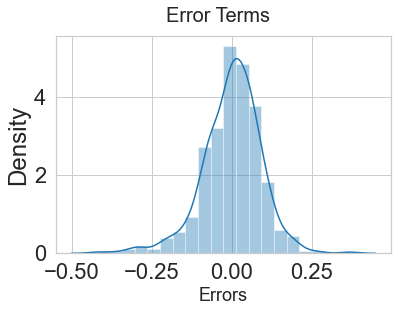

In [121]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

`3.3.i.1. Inference`<br>
<font color = red>The error terms are normally distributed with the mean value as 0 and hence the model validates the assumption "Error terms are normally distributed with mean zero".<br>

In [122]:
res = y_train - y_train_pred
res.head()

653    0.142839
576    0.083381
426    0.007172
728   -0.189039
482   -0.074159
dtype: float64

In [123]:
 y_train_pred.head()

653    0.721404
576    0.744276
426    0.458083
728    0.393135
482    0.557132
dtype: float64

In [124]:
# Add the results to the original bike dataframe
resAnalysis = pd.concat([y_train_pred, res], axis = 1)
resAnalysis.head()
resAnalysis.rename(columns = { 0: 'fittedValue', 1 : 'residual'}, inplace = True)
resAnalysis.head()

,fittedValue,residual
653,0.721404,0.142839
576,0.744276,0.083381
426,0.458083,0.007172
728,0.393135,-0.189039
482,0.557132,-0.074159


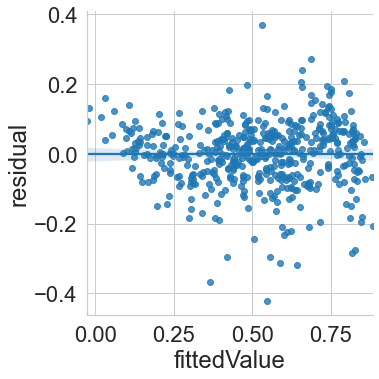

In [125]:
import seaborn as sns
sns.lmplot(x ="fittedValue", y = "residual", data = resAnalysis)

`3.3.i.2. Inference`<br>
<font color = red> There is no trend when we plot the variance vs fitted value and hence Error terms are independent of each other.<br>

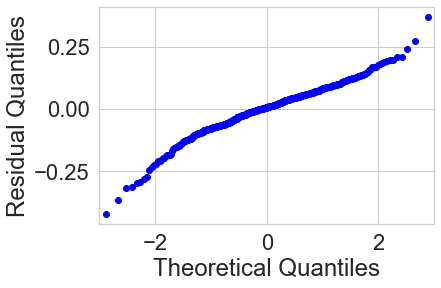

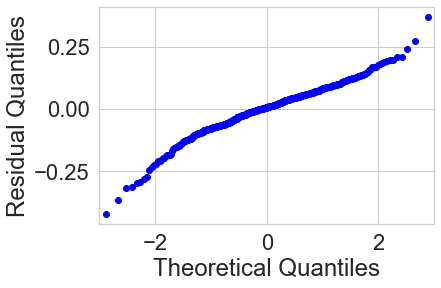

In [126]:
import statsmodels.api as sm
sm.qqplot(resAnalysis["residual"], ylabel = "Residual Quantiles" )

`3.3.i.3. Inference`<br>
<font color = red> As we can see from the above graph the variance of error term is constant and hence the model validates the assumption "Error terms have constant variance (homoscedasticity):".<br>

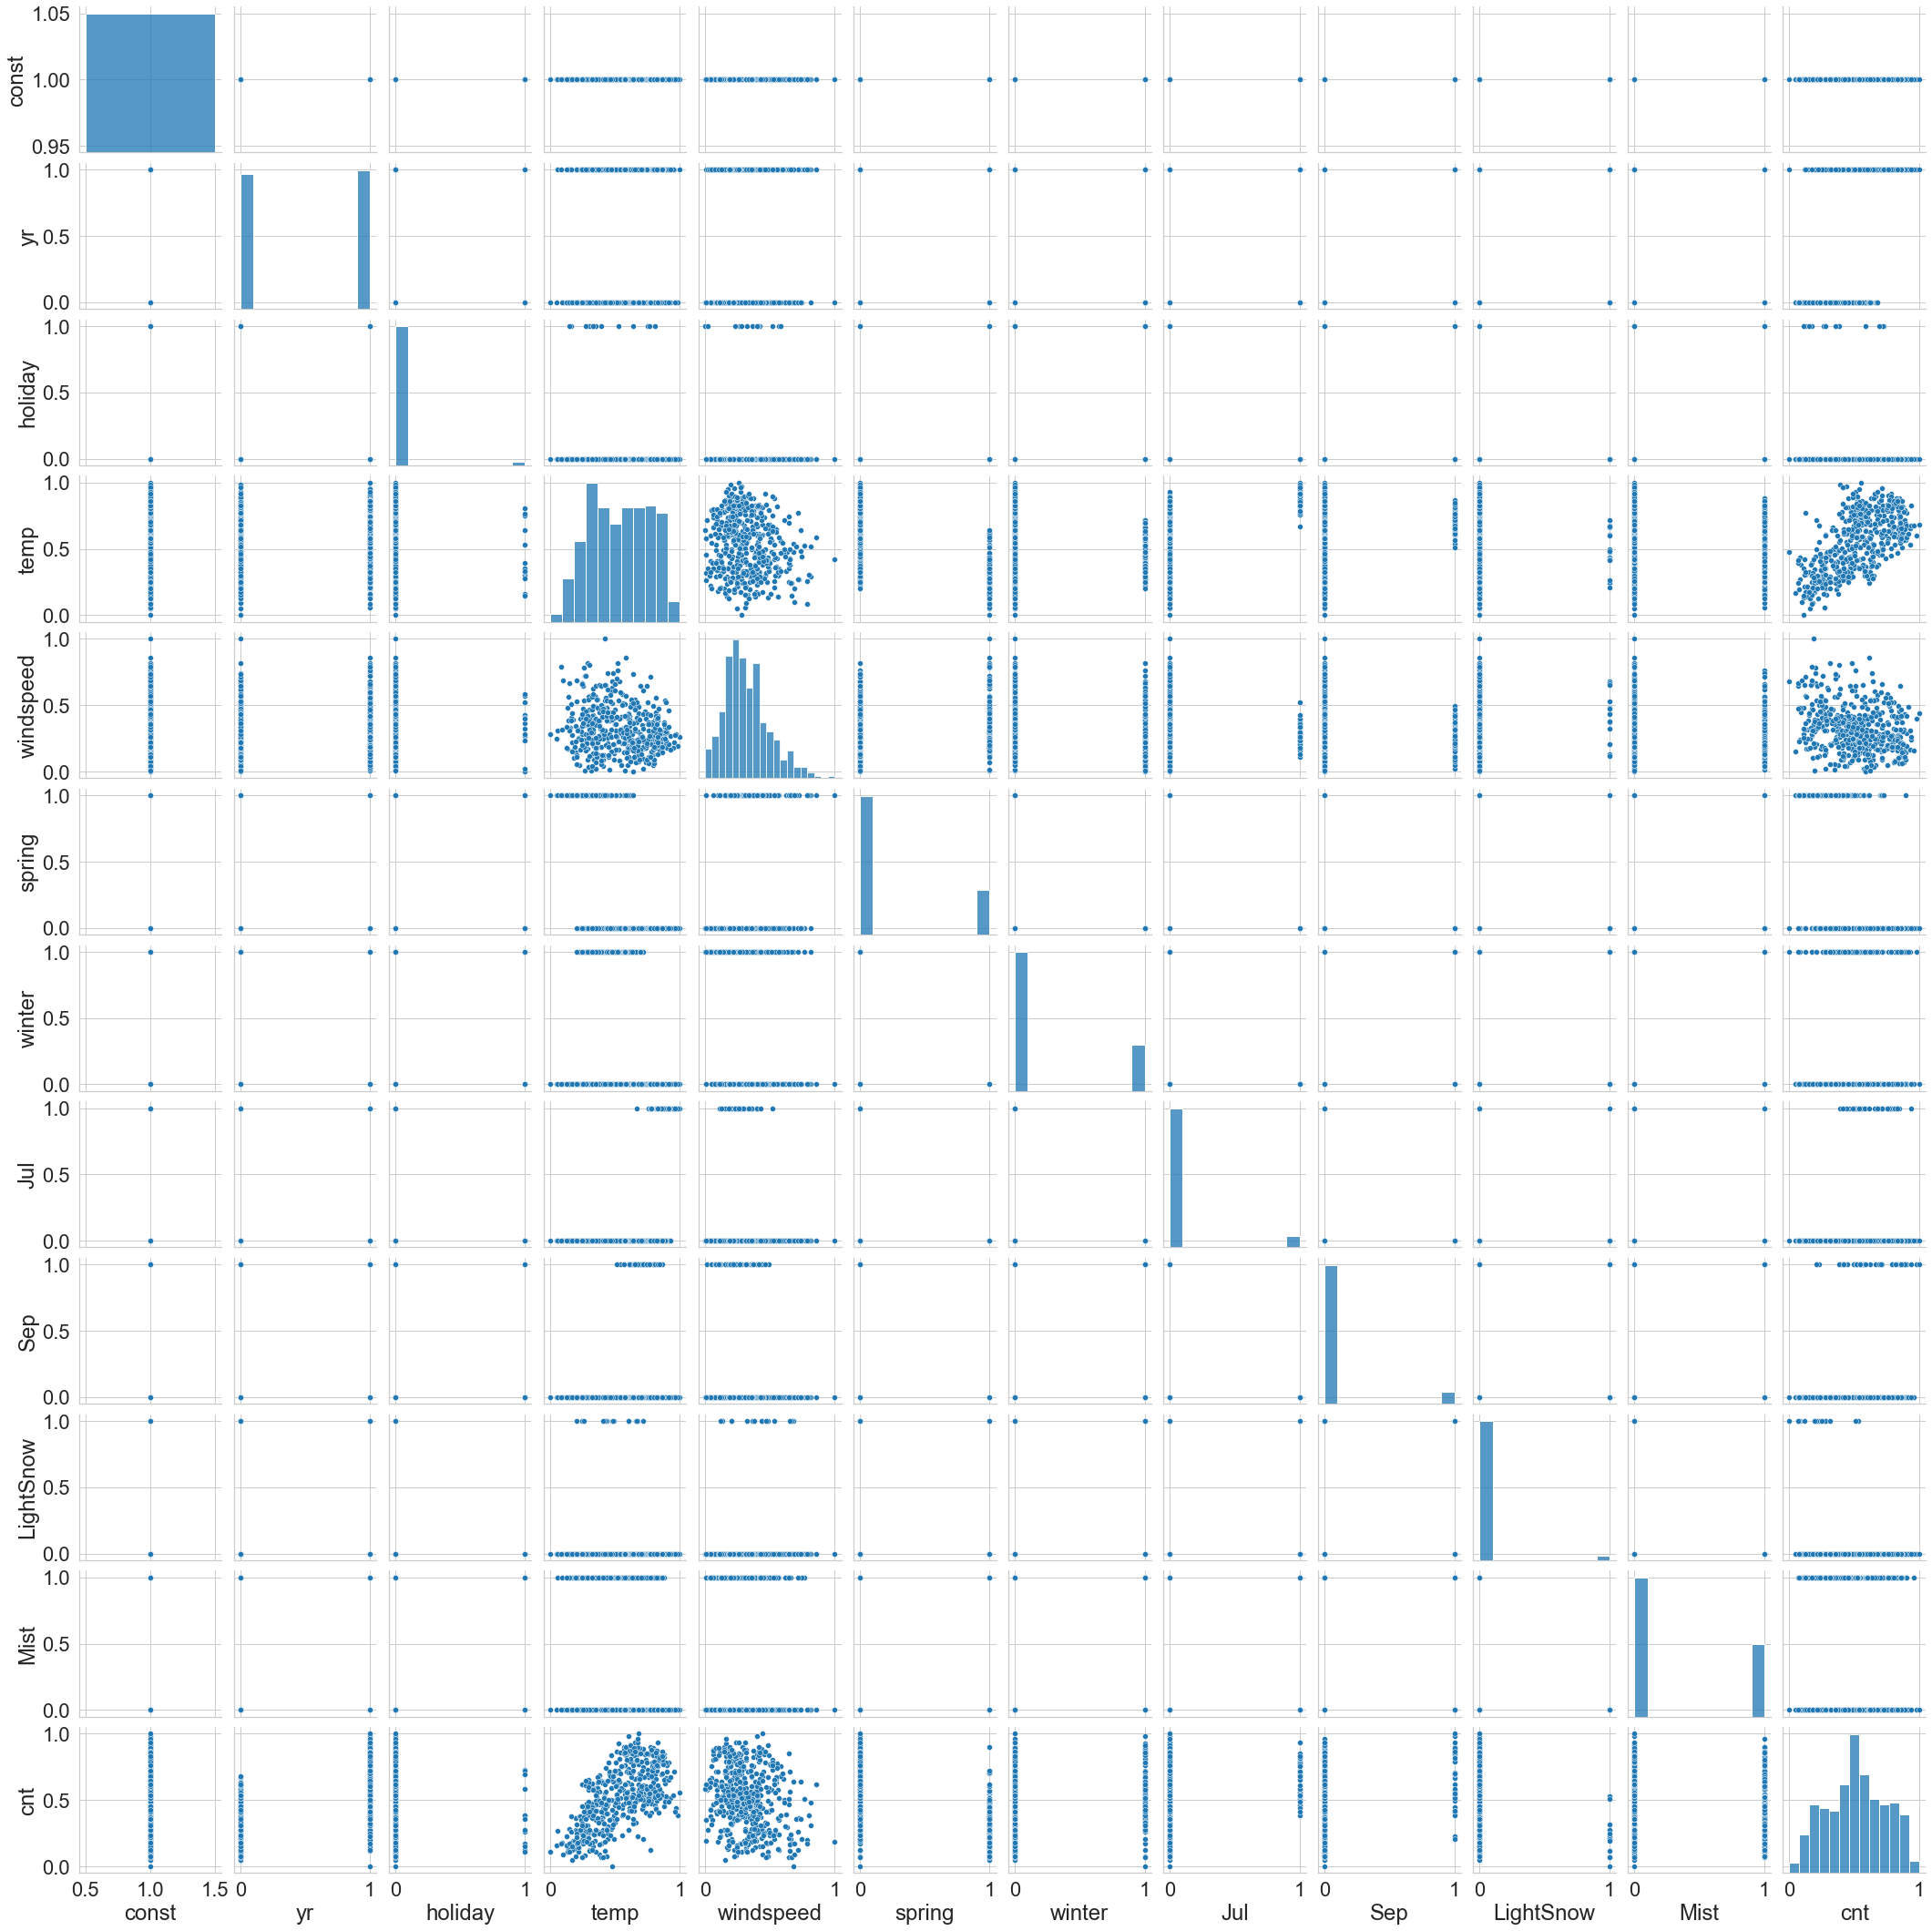

In [127]:
# Validate the assumption of dependent and independent variable
Traindf= pd.concat([X_train_rfe, y_train ], axis = 1)
Traindf.head()
Traindf.rename(columns = { 0: 'fittedValue'}, inplace = True)
Traindf.head()

sns.pairplot(Traindf)
plt.show()

`3.3.i.4. Inference`<br>
<font color = red> As we can see from the above graph all the independent variables have linear relations 
with dependent variable thus validating the assumption "There is a linear relationship between dependent and
indepndendt variable"
.<br>

## 3.5 Making Predictions

#### In order to apply the model on the Test data,  the numerical variables will have to be scaled

In [128]:
print(numVar)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [129]:
# Apply scaler on test data
df_test[numVar] = scaler.fit_transform(df_test[numVar])

#### Dividing into X_test and y_test

In [130]:
y_test = df_test.pop('cnt')
X_test = df_test

In [131]:
X_train_rfe_modified.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'Jul', 'Sep',
       'LightSnow', 'Mist'],
      dtype='object')

In [132]:
X_train_rfe =  X_train_rfe.drop(['const'], axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'Jul', 'Sep',
       'LightSnow', 'Mist'],
      dtype='object')

In [133]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by choosing variables from X_train_rfe_modified

X_test_new = X_test[X_train_rfe.columns]

In [134]:
X_test_new.head()

,yr,holiday,temp,windspeed,spring,winter,Jul,Sep,LightSnow,Mist
184,0,1,0.837241,0.149393,0,0,1,0,0,1
535,1,0,0.911423,0.231142,0,0,0,0,0,0
299,0,0,0.496221,0.443398,0,1,0,0,0,1
221,0,0,0.890387,0.449707,0,0,0,0,0,0
152,0,0,0.821739,0.682387,0,0,0,0,0,0


In [135]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [136]:
X_test_new.shape

(219, 11)

In [137]:
X_test_new.head()

,const,yr,holiday,temp,windspeed,spring,winter,Jul,Sep,LightSnow,Mist
184,1.0,0,1,0.837241,0.149393,0,0,1,0,0,1
535,1.0,1,0,0.911423,0.231142,0,0,0,0,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0,0,1
221,1.0,0,0,0.890387,0.449707,0,0,0,0,0,0
152,1.0,0,0,0.821739,0.682387,0,0,0,0,0,0


In [138]:
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [139]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [140]:
y_pred.head()

184    0.356581
535    0.865140
299    0.380071
221    0.590993
152    0.527469
dtype: float64

## <font color = Red>4.0.Model Evaluation</font>

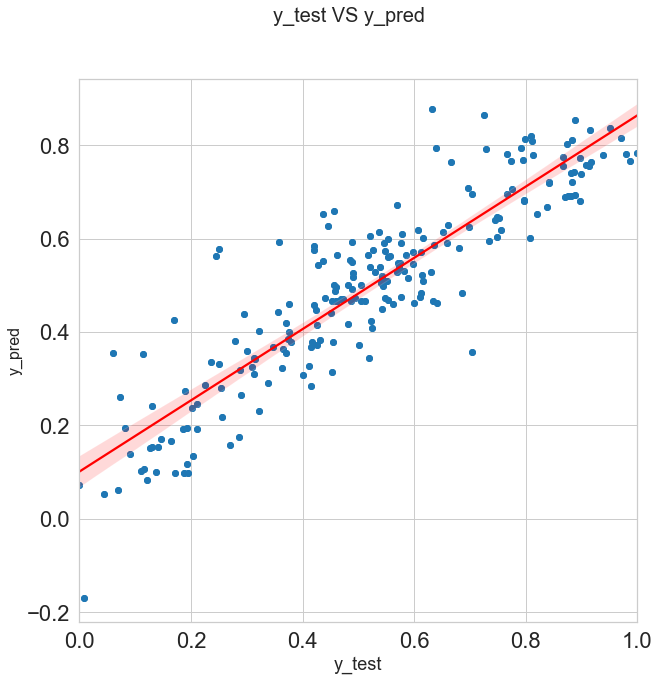

In [141]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,10))

plt.scatter(y_test,y_pred)
sns.regplot(y_test,y_pred, line_kws={"color": "red"})

fig.suptitle('y_test VS y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [142]:
# Add the results to the original bike dataframe
y_test_and_pred = pd.concat([y_test, y_pred], axis = 1)
y_test_and_pred.head()

,cnt,0
184,0.704300,0.356581
535,0.725421,0.865140
299,0.278853,0.380071
221,0.545512,0.590993
152,0.569148,0.527469


In [143]:
y_test_and_pred.rename(columns = {'cnt' : 'y_test', 0 : 'y_pred'}, inplace = True)
y_test_and_pred.head()

,y_test,y_pred
184,0.704300,0.356581
535,0.725421,0.865140
299,0.278853,0.380071
221,0.545512,0.590993
152,0.569148,0.527469


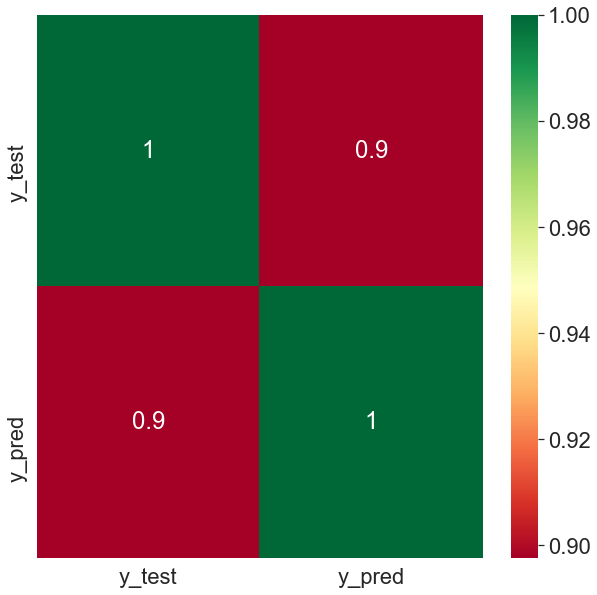

In [144]:
# Let's check the correlation coefficients between y_test and y_test_pred
%matplotlib inline
sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(10,10))
sns.heatmap(y_test_and_pred.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [145]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7953777856921882

In [146]:
# Adjsuted R Sqaure:

rSQR=r2_score(y_test, y_pred)
n=len(X_test)
p=len(X_test_new.columns)-1
aRSQR=1-(1-rSQR)*((n-1)/(n-p-1))

print("R SQUARE VALUE FOF THE MODEL IN TEST DATASET: ",rSQR)
print("number of rows in the sample: ", n)
print("number of variables used: ", p)
print("Adjusted R SQUARE VALUE FOF THE MODEL IN TEST DATASET: ", aRSQR)

R SQUARE VALUE FOF THE MODEL IN TEST DATASET:  0.7953777856921882
number of rows in the sample:  219
number of variables used:  10
Adjusted R SQUARE VALUE FOF THE MODEL IN TEST DATASET:  0.7855401792350818


In [148]:
# ---Model 1 
# OLS Regression Results                            
# ==============================================================================
# Dep. Variable:                    cnt   R-squared:                       0.833
# Model:                            OLS   Adj. R-squared:                  0.830
# Method:                 Least Squares   F-statistic:                     248.7
# Date:                Sun, 09 May 2021   Prob (F-statistic):          1.16e-186
# Time:                        22:38:21   Log-Likelihood:                 494.70
# No. Observations:                 510   AIC:                            -967.4
# Df Residuals:                     499   BIC:                            -920.8
# Df Model:                          10                                         
# Covariance Type:            nonrobust                                         
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.2519      0.024     10.530      0.000       0.205       0.299
# yr             0.2341      0.008     28.224      0.000       0.218       0.250
# holiday       -0.0986      0.026     -3.752      0.000      -0.150      -0.047
# temp           0.4515      0.031     14.758      0.000       0.391       0.512
# windspeed     -0.1398      0.025     -5.559      0.000      -0.189      -0.090
# spring        -0.1108      0.015     -7.265      0.000      -0.141      -0.081
# winter         0.0473      0.012      3.804      0.000       0.023       0.072
# Jul           -0.0727      0.017     -4.160      0.000      -0.107      -0.038
# Sep            0.0577      0.016      3.635      0.000       0.027       0.089
# LightSnow     -0.2864      0.025    -11.499      0.000      -0.335      -0.237
# Mist          -0.0811      0.009     -9.182      0.000      -0.098      -0.064
# ==============================================================================
# Omnibus:                       58.020   Durbin-Watson:                   2.002
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
# Skew:                          -0.601   Prob(JB):                     9.80e-31
# Kurtosis:                       5.249   Cond. No.                         14.0
# ==============================================================================
# ---


### <font color = red>Summary and Recomendation</font><br>

#### <font color = Green >Model building proces:</font><br>

1. Read Data:<br>
   Reading and Understanding the data. <br><br>
1. Data Preperation:<br>
    Variables were studied and as part that few variables were dropped and the others were categorised and treated as below:
      1. Binary Variables: No treatment
      1. Categorical Variables: Created dummy variables and removed the original variables
      1. Numeric Variables: Scale the variable using MinMaxscaler to get them in the same unit. This is done seperately for Train and Test datasets.
      1. Split the Data into Train and Test  <br><br>
1. Model building:<br>
   Combined model building approach was taken. Ie Build the model using RFE with a cut off as 15 variables and further feature reduction was carried out using manual process of removing the varibles one by one.<br>
   1. Two models were build as per the below logic:
     1. Model1: Use the RFE variables and fit the model using OLE and remove the variables with VIF more than 5. In the process , temp came out to be having VIF more than 5 and hence the variable with max p value was removed until all the VIF is less than 5 and number of variables are less than 10.
     1. Model2: Use the RFE variables but take atemp instead of temp as its VIF was more than 5 in the model1 process. Fit the model using OLE and remove the variables with p value more than 0.05 and VIF more than 5. **Once this is done**, remove the variables with max p values one by one until the number of variables are less than 10.
     1. Choose the model with the higher Adjusted R Sqaure value and lower AIC. Model 1 was chosen.
The model equation is | <br><br>cnt = 0.2519 + 0.2341 x yr  - 0.0986 x holiday + 0.4515 x temp - 0.1398 x windspeed - 0.1108 x spring + 0.0473 x winter - 0.0727 x Jul +0.0577 x Sep - 0.2864 x LightSnow - 0.0811 x Mist |<br><br>
The model summary:<br>
R-squared:                       0.833 <br>
Adj. R-squared:                  0.830 <br>
F-statistic:                     248.7 <br>
Prob (F-statistic):          1.16e-186 <br>
AIC:                            -967.4 <br>
   1. Do the residual Analysis to confirm the Liner Regression Assumptions
   1. Apply the chosen model on the test data:
       1. Scale the numeric variables and predict the target variable using the model. <br><br>
1. Model Evaluation:<br>
   1. Calculate the R Square and the adjsuted RSquare on the test data set.
    * R SQUARE VALUE FOF THE MODEL IN TEST DATASET:  0.795
    * Adjusted R SQUARE VALUE FOF THE MODEL IN TEST DATASET:  0.785
   1. As the above stats are 79% which is less than 5% the model R SQUARE value of 83%, the model is found to be fitting the test data set as well and hence the model has been chosen for Business recommendation for implementation.

#### <font color = Green >Insights and Recomendation</font><br>

<!-- Feature	Slope	Inference
temp	0.4515	Every unit increase in the  temp  increases the daily user count by 0.4515
yr	0.2341	If the year happens to be 2019, then the daily user count increases by 0.2341
Sep	0.0577	If the month happens to be Sep then the daily user count increases by 0.0577
winter	0.0473	If the season happens to be winter then the daily user count increases by 0.0473
Jul	-0.0727	If the month happens to be Jul  then the daily user count decreases by 0.0727
Mist	-0.0811	If the weather happens to be Mist then the daily user count decreases by 0.0811
holiday	-0.0986	If the day happens to be holiday  then the daily user count by decreases 0.0986
spring	-0.1108	If the season happens to be spring then the daily user count decreases by 0.1108
windspeed	-0.1398	Every unit increase in the windspeed  decreases the daily user count by 0.1398
LightSnow	-0.2864	Every unit increase in the LightSnow  decreases the daily user count by 0.2864 -->
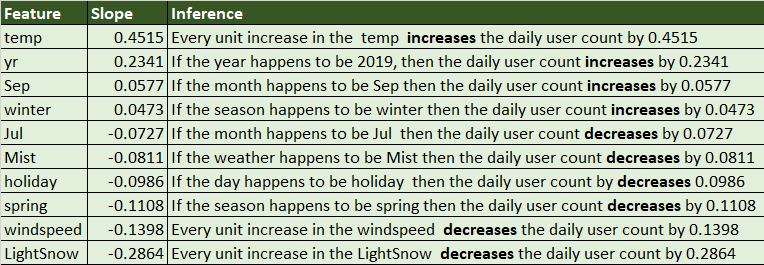

<font color = Green >
</font>

# end of the file